In [94]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers as layers
import matplotlib.pyplot as plt 

import tensorflow.keras.backend as kb
#####
#텐서플로우 커스텀 레이어로 adaline 구현 및 미니배치 학습 구현
#####

In [95]:
"""
Wine Quality Dataset
The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

It is a multi-class classification problem, but could also be framed as a regression problem. 
The number of observations for each class is not balanced. 
There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:

Fixed acidity.
Volatile acidity.
Citric acid.
Residual sugar.
Chlorides.
Free sulfur dioxide.
Total sulfur dioxide.
Density.
pH.
Sulphates.
Alcohol.
Quality (score between 0 and 10).
The baseline performance of predicting the mean value is an RMSE of approximately 0.148 quality points.
"""

'\nWine Quality Dataset\nThe Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.\n\nIt is a multi-class classification problem, but could also be framed as a regression problem. \nThe number of observations for each class is not balanced. \nThere are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:\n\nFixed acidity.\nVolatile acidity.\nCitric acid.\nResidual sugar.\nChlorides.\nFree sulfur dioxide.\nTotal sulfur dioxide.\nDensity.\npH.\nSulphates.\nAlcohol.\nQuality (score between 0 and 10).\nThe baseline performance of predicting the mean value is an RMSE of approximately 0.148 quality points.\n'

In [96]:
data=pd.read_csv("C:\\Users\ksi03\Desktop\DeepLearningTeam\Study\PythonMachineLearning\이준혁\winequality-white.csv", sep=';')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [134]:
dataset=["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", 
         "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]


x_data=data.loc[:,dataset].values     #fixed acidity~Alcohol을 input dataset으로 정의
y_data=data.loc[:, "quality"].values

for i in range(len(y_data)):
    if y_data[i]<6:     #0~5
        y_data[i]=0.0/1
    if y_data[i]>=6:     #0~5
        y_data[i]=1.0/1
        
x_train=x_data[0:3000]
y_train=y_data[0:3000].astype('float64')

x_valid=x_data[3000:]
y_valid=y_data[3000:].astype('float64')


print(y_train.dtype)
print(x_train.dtype)
print(y_valid.dtype)
print(x_valid.dtype)

float64
float64
float64
float64


Text(0.5, 1.0, 'alchohol-acidity scatter')

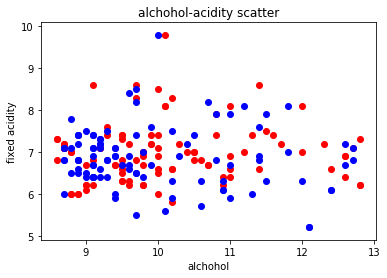

In [135]:
plt.scatter(x_data[0:100, 10], x_data[0:100, 0], color='red', marker='o')
plt.scatter(x_data[100:200, 10], x_data[100:200, 0], color='blue', marker='o')

plt.xlabel('alchohol')
plt.ylabel('fixed acidity')
plt.title('alchohol-acidity scatter')
#특성이 다양한 고차원 배열이기에 두 특성만으로 분류를 나타내기 어렵다..만 그냥 예시적으로 보자

In [155]:
class adaline_custom(layers.Layer):
    """custom layer with one weight and one bias"""
    def __init__(self, input_size):
        super(adaline_custom, self).__init__()
        
        self.w1 = self.add_weight(shape=(input_size, 11),
                             trainable=True,
                             dtype='float32')


        self.b1 = self.add_weight(shape=(11, ),
                             trainable=True,
                             dtype='float32')


    def call(self, inputs, activation_function='relu'):

        input1=tf.matmul(inputs, self.w1) + self.b1
        out=tf.nn.sigmoid(input1)
        #out=0
        #if(input1>=0): out=1
        #elif(input1<0): out=-1
        #다중 레이블 데이터이기에 일반 계단함수 사용 불가
        return out

    def getweight(self):
        return self.w1

    def getbias(self):
        return self.b1
   

In [156]:
input1=tf.keras.Input(shape=[11])
output=adaline_custom(input_size=11)(input1)
model = tf.keras.models.Model(inputs=input1, outputs=output)

In [157]:
def sse(y_true, y_pred):
    loss=kb.sum(0.5*(y_true-y_pred))
    return loss

In [164]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= sse, 
             metric=['accuracy'])

In [165]:
loss=[]
for step in range(100):
    train_hist = model.fit(x_train, y_train, batch_size=100, verbose=1)
    loss.append(train_hist.history['loss'][0])

Train on 3000 samples
3000/3000 [==============================] - 0s 72us/sample - loss: -549.9350
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9750
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9854
Train on 3000 samples
3000/3000 [==============================] - 0s 16us/sample - loss: -549.9901
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9930
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9942
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9956
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9963
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9969
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9974


Train on 3000 samples
3000/3000 [==============================] - 0s 16us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 16us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 14us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 16us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 15us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 14us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 16us/sample - loss: -549.9999
Train on 3000 samples
3000/3000 [==============================] - 0s 18us/sample - loss: -549.9999


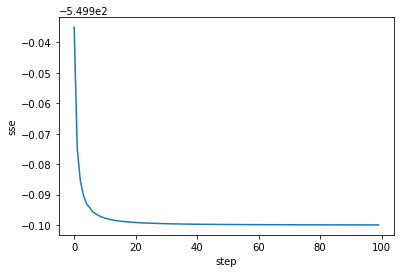

In [166]:
plt.plot(loss)
plt.xlabel('step')
plt.ylabel('sse')

plt.show()

conclusion
adaline was available to minimize loss